# Regression Testing
Variables used: hospital admissions and number of COVID-19 cases.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt

## Load and filter the datasets by date


In [3]:
# Load datasets 
hosp_df = pd.read_csv('filtered_datasets/hospital.csv')
cases_df = pd.read_csv('filtered_datasets/cases_state.csv')

# Parse the date column 
hosp_df['date'] = pd.to_datetime(hosp_df['date'])
cases_df['date'] = pd.to_datetime(cases_df['date'])

# Filter the dataset for a specific period where cases are booming
# Filter data from start_date to end_date
start_date = '2021-01-01'
end_date = '2021-06-30'
hosp_df = hosp_df[(hosp_df['date'] >= start_date) & (hosp_df['date'] <= end_date)]
cases_df = cases_df[(cases_df['date'] >= start_date) & (cases_df['date'] <= end_date)]

# Group the data by date and sum the cases for each date
daily_cases = cases_df.groupby('date')['cases_new'].sum().reset_index()
daily_hosp = hosp_df.groupby('date')['admitted_total'].sum().reset_index()

# Merge the two datasets
merged_df = pd.merge(daily_cases, daily_hosp, on='date')

merged_df.head()

,date,cases_new,admitted_total
0,2021-01-01,2068,663
1,2021-01-02,2295,755
2,2021-01-03,1704,786
3,2021-01-04,1741,745
4,2021-01-05,2027,832


## Initialize variables

In [5]:
# Independent variable (number of cases)
X = merged_df[['cases_new']].values

# Dependent variable (number of hospital admissions)
y = merged_df['admitted_total']

## Split data into training and testing sets

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize linear regression model

In [7]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

## Evaluate the model

In [8]:
# Evaluate the model using different metrics
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))



Linear Regression
Mean Squared Error: 63230.17203222365
Mean Absolute Error: 177.51780858908938
R2 Score: 0.6832916035090475
Explained Variance Score: 0.6925247104915788
Mean Absolute Percentage Error: 0.1646174036732214


## Visualize the results

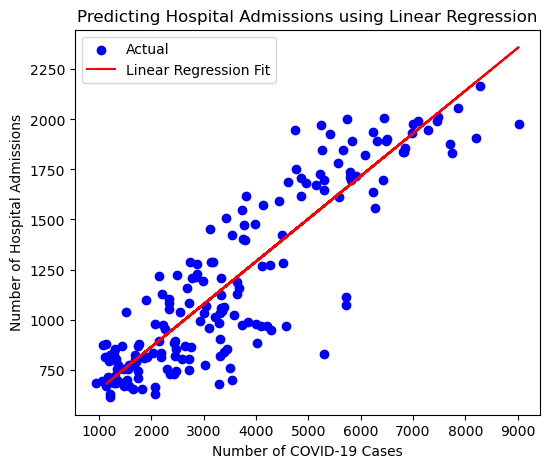

In [12]:
# Visualize the results
plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Fit')
plt.xlabel('Number of COVID-19 Cases')
plt.ylabel('Number of Hospital Admissions')
plt.title('Predicting Hospital Admissions using Linear Regression')
plt.legend()
plt.show()